This Notebook features code for NLP related graphs in my Datto Take Home. Note that some code was repurposed from this blog post: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [326]:
#import packages and load data
import numpy as np
import pandas as pd
import datetime as dt
import re
import os
data = pd.read_excel("datto_exercise_cleaned_new.xlsx", index_col = None)

In [327]:
#subset data for comments with rating below 4 to identify dissatisfied themes
data = data[data['Rating'] < 4]
data.shape

(3343, 7)

In [328]:
# Remove punctuation
data['Comment'] = data['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the comments to lowercase
data['Comment'] = data['Comment'].map(lambda x: x.lower())
# Print out the first rows for validation
data['Comment'].head()

3                                            no comment
5     audio stream not available or available with s...
12                                           no comment
18                                           no comment
31                                           no comment
Name: Comment, dtype: object

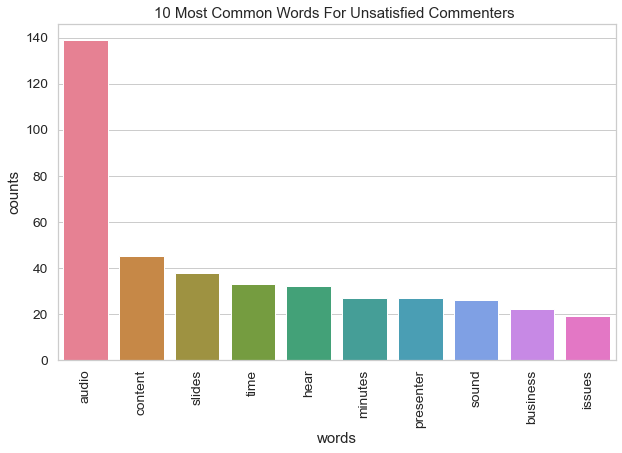

In [329]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette()
sns.set_palette("Paired")
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 10/1.6180))
    plt.subplot(title='10 Most Common Words For Unsatisfied Commenters ')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.savefig('most_common_words.png',dpi=300,bbox_inches='tight')
    plt.show()
#add extra stopwords for Datto file
stop_w = ['information','informative','did','interesting','presentation','datto','thank','great','good','excellent','helpful','useful','comment','no','thanks','best','practices', 'the', 'webinar','of','on','how','for','to','of','in','is','to','your','and','demand','with','what']

# Initialise the count vectorizer with the English stop words + extra stop words
stop_words = text.ENGLISH_STOP_WORDS.union(stop_w)
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed comments
count_data = count_vectorizer.fit_transform(data['Comment'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

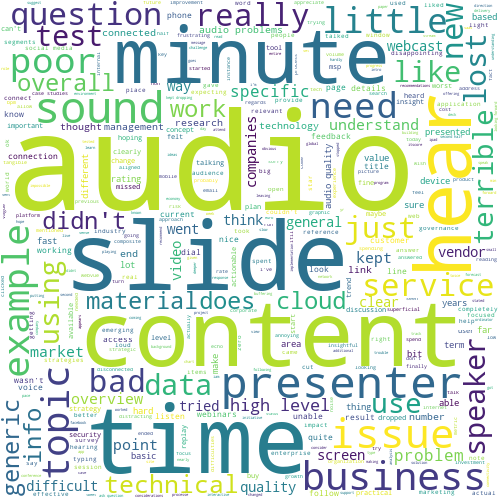

In [330]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed Comments together.
long_string = ','.join(list(data['Comment'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=4, contour_color='steelblue',stopwords=stop_words,width=500,height=500)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()